<h1> Import </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')
import sklearn.model_selection as ms
from scipy.stats import norm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso, ElasticNet 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from xgboost import XGBRegressor
%matplotlib inline

In [2]:
#import dataset
model_trainylog = pd.read_csv('try3.csv')
model_test = pd.read_csv('te3.csv')

In [3]:
model_trainylog.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ylogSalePrice
0,0,60,6.831328,20.212182,7,5,15.187527,15.187527,9.059126,12.170327,...,0,0,0,1,0,0,0,1,0,12.247699
1,1,20,7.221214,20.712205,6,8,15.145138,15.145138,1.000000,13.062832,...,0,0,0,1,0,0,0,1,0,12.109016
2,2,60,6.914940,21.347241,7,5,15.184404,15.185966,8.646538,11.200343,...,0,0,0,1,0,0,0,1,0,12.317171
3,3,70,6.684507,20.691553,7,5,15.047529,15.135652,1.000000,9.274266,...,0,0,0,1,0,0,0,0,0,11.849405
4,4,60,7.314735,22.325160,8,5,15.182841,15.182841,10.391827,11.971129,...,0,0,0,1,0,0,0,1,0,12.429220


<h1> Train and Test Data Split </h1>

In [4]:
X = model_trainylog.drop(['ylogSalePrice'], axis = 1)
y = model_trainylog['ylogSalePrice']

In [5]:
#Partition the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2)

In [6]:
# Stratified KFold
stratify_divide = StratifiedKFold(n_splits=10, shuffle=True, random_state=99)

In [7]:
# KFold for Cross Validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 28)

In [8]:
#RMSE_CV
def rmse_cv(model):
    kf = KFold(n_splits = 5, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

<h1> XGBoost </h1>

In [9]:
xgb = XGBRegressor()

xgb.set_params(random_state=22)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=22,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [10]:
xgb.fit(X_train, y_train)

[10:46:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=22,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [11]:
print("The train set R^2 is: %.5f" % xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % xgb.score(X_test, y_test))

The train set R^2 is: 0.95748
The test set R^2 is is: 0.89650


In [12]:

# Initial prediction
xgb_pred = xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14402.29
Mean Squared Error (MSE): 0.01634602635229488
Root Mean Square Error (RMSE): 0.1278515793891295
Mean Absolute Percent Error (MAPE): 9.07 %.


In [13]:
xgb_param_grid ={'learning_rate': [0.01, 0.05, 0.1],
                 'max_depth': [2, 3, 4, 5, 6],
                 'min_child_weight': [4, 5, 6],
                 'n_estimators': [400, 450, 500, 550, 600]}

grid_search_xgb = GridSearchCV(xgb, xgb_param_grid, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_xgb.fit(X_train, y_train)

[11:41:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 11.4 s, sys: 474 ms, total: 11.9 s
Wall time: 55min 9s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthrea...
                                    objective='reg:linear', random_state=22,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
      

In [14]:
# get the best parameters
grid_search_xgb.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 5,
 'n_estimators': 600}

In [15]:
grid_xgb = grid_search_xgb.best_estimator_

In [16]:
print("The train set R^2 is: %.5f" % grid_xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_xgb.score(X_test, y_test))

The train set R^2 is: 0.96224
The test set R^2 is is: 0.90342


In [17]:
#Prediction with tuned hyperparameters
grid_xgb_pred = grid_xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13985.91
Mean Squared Error (MSE): 0.015253737354135198
Root Mean Square Error (RMSE): 0.12350602152986387
Mean Absolute Percent Error (MAPE): 8.68 %.


In [18]:
xgb_param_grid1 ={'learning_rate': [0.01],
                 'max_depth': [3],
                 'min_child_weight': [0],
                 'n_estimators': [3460],
                 'subsample': [0.7],
                 'colsample_bytree' : [0.7],
                 'objective':['reg:linear'],
                 'nthread':[-1],
                 'scale_pos_weight':[1],
                 'seed':[27],
                 'reg_alpha': [0.00006]}
                 

grid_search_xgb1 = GridSearchCV(xgb, xgb_param_grid1, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_xgb1.fit(X_train, y_train)

[11:42:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 31 s, sys: 82.2 ms, total: 31.1 s
Wall time: 1min 46s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthrea...
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.01],
                         'max_depth': [3], 'min_child_weight': [0],
                         'n_estimators': [3460], 'nthread': [-1],
                         'objective': ['reg:linear'], 'reg_alpha': [6e-05],
                         'scale_pos_weight': [1], 'seed': [27],

In [19]:
grid_search_xgb1.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 0,
 'n_estimators': 3460,
 'nthread': -1,
 'objective': 'reg:linear',
 'reg_alpha': 6e-05,
 'scale_pos_weight': 1,
 'seed': 27,
 'subsample': 0.7}

In [20]:
grid_xgb1 = grid_search_xgb1.best_estimator_

In [21]:
print("The train set R^2 is: %.5f" % grid_xgb1.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_xgb1.score(X_test, y_test))

The train set R^2 is: 0.98744
The test set R^2 is is: 0.90784


In [22]:
#Prediction with tuned hyperparameters
grid_xgb_pred1 = grid_xgb1.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_xgb_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_xgb_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13985.91
Mean Squared Error (MSE): 0.014555123328085933
Root Mean Square Error (RMSE): 0.12064461582717205
Mean Absolute Percent Error (MAPE): 8.68 %.


In [23]:
score = rmse_cv(grid_xgb)
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[11:43:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:43:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:43:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:43:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:43:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBoost score: 0.1194 (0.0127)



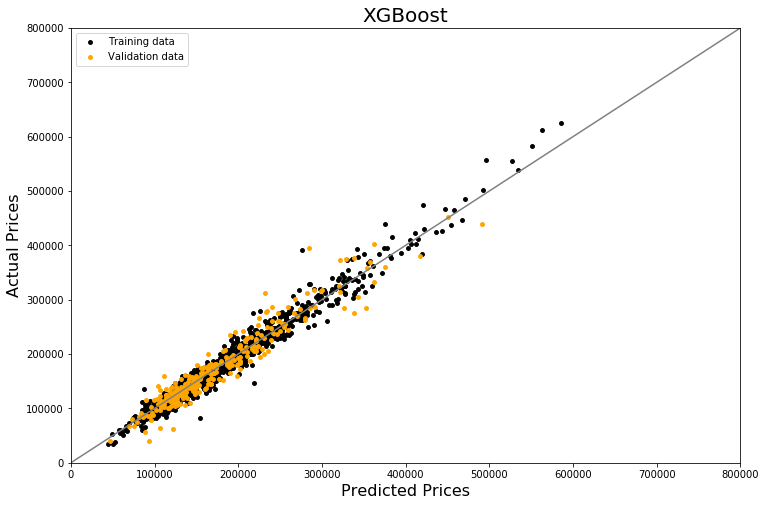

In [24]:
y_train_xgboost =grid_xgb.predict(X_train)
y_test_xgboost = grid_xgb.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_xgboost), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_xgboost), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("XGBoost", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [25]:
# Get numerical feature importances
importances_xgb = list(xgb.feature_importances_)

# List of tuples with variable and importance
feature_importances_xgb = [(feature, round(importance, 5)) for feature, importance in zip(X_train.columns, importances_xgb)]

# Sort the feature importances by most important first
xgb_feature_importances = sorted(feature_importances_xgb, key = lambda x: x[1], reverse = True )

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in xgb_feature_importances]

Variable: OverallQual          Importance: 0.1446000039577484
Variable: TotalSF              Importance: 0.09193000197410583
Variable: TotalBath            Importance: 0.09074000269174576
Variable: Fireplaces           Importance: 0.08872999995946884
Variable: CentralAir_Y         Importance: 0.05034000054001808
Variable: YearRemodAdd         Importance: 0.04678000137209892
Variable: MSZoning_RM          Importance: 0.0427899993956089
Variable: YearBuilt            Importance: 0.03652999922633171
Variable: GarageCars           Importance: 0.02986999973654747
Variable: MSZoning_RL          Importance: 0.026089999824762344
Variable: BsmtFinType1_GLQ     Importance: 0.024539999663829803
Variable: GarageArea           Importance: 0.01899000070989132
Variable: BsmtFinSF1           Importance: 0.016699999570846558
Variable: KitchenAbvGr         Importance: 0.01655000075697899
Variable: Neighborhood_Sawyer  Importance: 0.015560000203549862
Variable: Heating_Grav         Importance: 0.01341000

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [26]:
xgb_feature_importances_top20 = xgb_feature_importances[:20]
featureNames, featureScores = zip(*list(xgb_feature_importances_top20))
xgb_feature_importances_top20

[('OverallQual', 0.1446),
 ('TotalSF', 0.09193),
 ('TotalBath', 0.09074),
 ('Fireplaces', 0.08873),
 ('CentralAir_Y', 0.05034),
 ('YearRemodAdd', 0.04678),
 ('MSZoning_RM', 0.04279),
 ('YearBuilt', 0.03653),
 ('GarageCars', 0.02987),
 ('MSZoning_RL', 0.02609),
 ('BsmtFinType1_GLQ', 0.02454),
 ('GarageArea', 0.01899),
 ('BsmtFinSF1', 0.0167),
 ('KitchenAbvGr', 0.01655),
 ('Neighborhood_Sawyer', 0.01556),
 ('Heating_Grav', 0.01341),
 ('SaleType_New', 0.01296),
 ('SaleCondition_Normal', 0.01148),
 ('OverallCond', 0.0114),
 ('HeatingQC_Fa', 0.01059)]

Text(0.5, 1.0, 'Feature Importances')

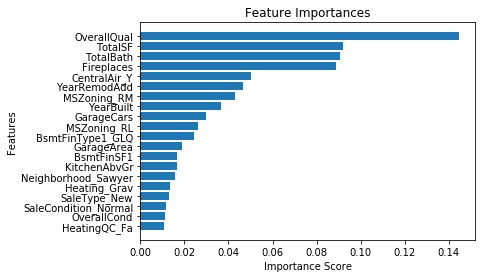

In [27]:
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.gca().invert_yaxis()
plt.title('feature importance')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importances')

In [28]:
xgb_params_tuned_model = grid_search_xgb.best_estimator_
xgb_feature_importance = 100.0 * (xgb_params_tuned_model.feature_importances_ / xgb_params_tuned_model.feature_importances_.max())
xgb_important_features = X_train.columns[xgb_feature_importance >= 2]
xgb_unimportant_features = X_train.columns[xgb_feature_importance < 2]

In [29]:
xgb_important_features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'TotalSF', 'TotalBath',
       'TotalPorchSF', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'HeatingQC_Fa', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_TA',
       'Functional_Typ', 'GarageType_Attchd', 'GarageFinish_Unf',
       'SaleType_New', 'SaleCondition_Normal'],
      dtype='object')

In [30]:
X_train_xgbreduced = X_train.drop(xgb_unimportant_features, axis=1)
X_test_xgbreduced = X_test.drop(xgb_unimportant_features, axis=1)

In [31]:
# GridSearchCV for multiple hyperparameters:
xgb=XGBRegressor()

xgb_param_grid ={'learning_rate': [0.05, 0.1, 0.15],
             'max_depth': [3, 4, 5],
             'n_estimators': [500, 1000, 2000]}

xgb.set_params(random_state=42)

grid_search_xgb2 = GridSearchCV(xgb, xgb_param_grid, scoring= 'neg_mean_squared_error',
                           cv= kf, n_jobs = 7, return_train_score=True, verbose = 1)
grid_search_xgb2.fit(X_train_xgbreduced, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   37.6s
[Parallel(n_jobs=7)]: Done 135 out of 135 | elapsed:  2.1min finished


[11:45:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthrea...e,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=7,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
     

In [32]:
# Use the xgboost's predict method on the test data
predictions_tuned_xgb2 = grid_search_xgb2.best_estimator_.predict(X_test_xgbreduced)

# Calculate the absolute errors
errors = abs(np.expm1(predictions_tuned_xgb2) - np.expm1(y_test))

# Print out the mean absolute error (MAE)
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('MSE:', mean_squared_error(y_test, predictions_tuned_xgb2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_tuned_xgb2)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))

# Calculate and display MAPE
#accuracy = 100 - np.mean(mape)
print('MAPE:', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13700.67
MSE: 0.015194901053232995
RMSE: 0.12326759936509267
MAPE: 8.67 %.


In [33]:
#Back to csv for kaggle
test_predict = grid_xgb.predict(model_test)
id_price = list(zip(range(1461, 2920), np.expm1(test_predict)))
id_price = list(map(lambda x: [x[0], round(x[1], 1)], id_price))
final_df = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])

In [34]:
final_df

,Id,SalePrice
0,1461,122041.796875
1,1462,163052.703125
2,1463,185539.796875
3,1464,194096.703125
4,1465,182774.406250
5,1466,170994.203125
6,1467,181850.796875
7,1468,165520.203125
8,1469,191330.406250
9,1470,122463.000000


In [35]:
final_df.to_csv('predictions_submission3.csv', index=False)